In [ ]:
!nvidia-smi

Mon May 20 16:15:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import pandas as pd

In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [ ]:
imbalance_data = pd.read_csv("/content/imbalanced_data.csv")
imbalance_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
imbalance_data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
imbalance_data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
imbalance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


EDA

In [ ]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

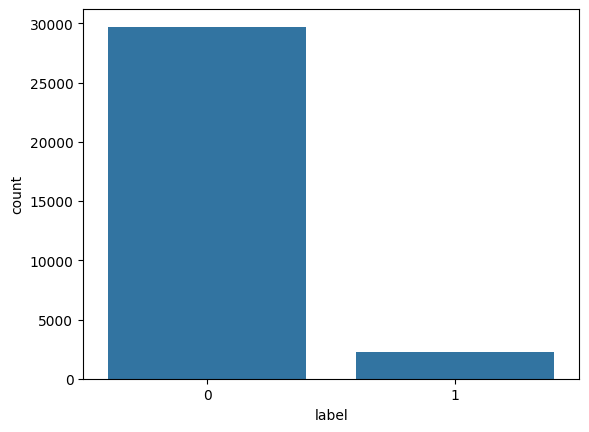

In [ ]:
sns.countplot(x='label',data = imbalance_data)

In [ ]:
# we can observe the above plot, It is clearly known as inbalance data
# here 0 represents -- NO-HATE and 1 represents HATE

* 0 ->>>> NO-Hate
* 1 ->>>> Hate

In [ ]:
imbalance_data.shape

(31962, 3)

In [ ]:
# from the data we dont required ID


In [ ]:
imbalance_data.drop("id", axis = 1, inplace = True)

In [ ]:
imbalance_data

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
raw_data = pd.read_csv("/content/raw_data.csv")

In [ ]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
raw_data.shape

(24783, 7)

In [ ]:
raw_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

from the data set we only required class and tweet ... droping all the unused columns

In [ ]:
raw_data.drop(["Unnamed: 0" , "count", "hate_speech", "offensive_language", "neither"], axis=1, inplace=True)

In [ ]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
raw_data['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

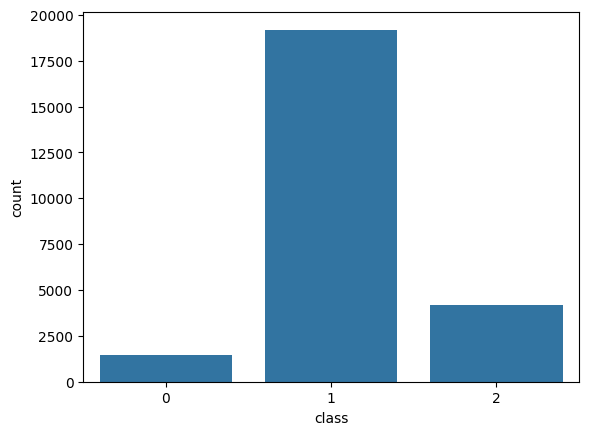

In [ ]:
sns.countplot(x='class', data = raw_data )

* Class 0 : Hate
* Class 1 : Abusive
* Class 2 : No Hate

In [ ]:
# Let copy Class 1 into class 0 because 0~=1

In [ ]:
raw_data[raw_data["class"]==0]["class"]=1

<ipython-input-20-1a306251621a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data["class"]==0]["class"]=1


In [ ]:
raw_data['class'].unique()

array([2, 1, 0])

In [ ]:
## Replace 0 with one
raw_data['class'].replace({0:1},inplace=True)

In [ ]:
raw_data['class'].unique()

array([2, 1])

In [ ]:
# Here we know 1 is hate and 2 is no hate . if you refer imbalance data set 1 is no hate and 0 is hate so
# Replace 2 with 0
raw_data['class'].replace({2:0},inplace=True)

In [ ]:
raw_data['class'].unique()

array([0, 1])

<Axes: xlabel='class', ylabel='count'>

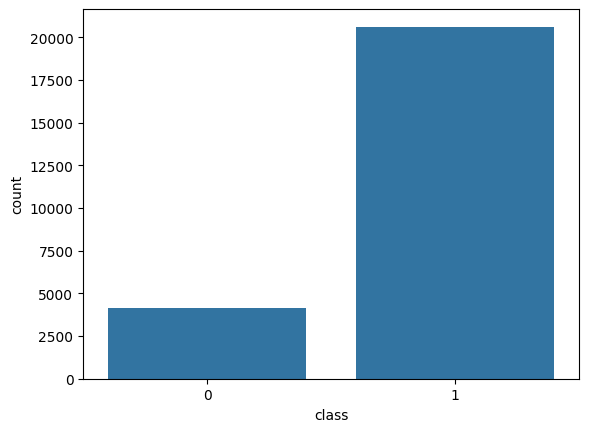

In [ ]:
sns.countplot(x="class",data = raw_data)

In [ ]:
raw_data.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
raw_data.rename(columns={"class":"label"},inplace=True)

In [ ]:
raw_data

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


## Concatinating

In [ ]:
df=pd.concat([imbalance_data,raw_data])

In [ ]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
df.shape

(56745, 2)

<Axes: xlabel='label', ylabel='count'>

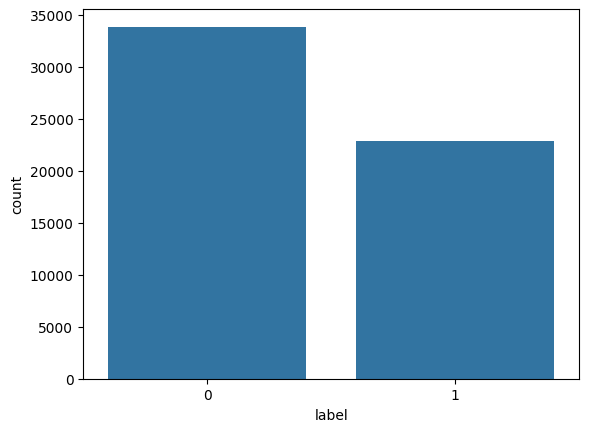

In [ ]:
sns.countplot(x='label',data = df)

# Data Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string

In [ ]:
# Step 1 :- Applying stemming and stopwords
stemmer = nltk.SnowballStemmer('english')
stopwords = set(stopwords.words("english"))

In [ ]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# Data cleaning
def data_cleaning(words):
  words = str(words).lower()# applying the lower case operation
  words = re.sub('\[.*?/]','',words) # handle HTML tabs
  words = re.sub('https?://\S+|www\.\S+','',words) # URL cleaning
  words = re.sub('<.*?>+','',words)# emoji's and tags
  words = re.sub('[%s]' % re.escape(string.punctuation),'',words) # punctuation handling
  words = re.sub('\n','',words)
  words = re.sub('\w*\d\w*','',words)
  words = [word for word in words.split(' ') if words not in stopwords]# stopwords
  words = " ".join(words)
  words = [stemmer.stem(words) for word in words.split(' ')]## applying stemming --- it will take root word
  words =" ".join(words)

  return words


In [ ]:
df['tweet'][1]

1    @user @user thanks for #lyft credit i can't us...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
Name: tweet, dtype: object

In [ ]:
# applying data_cleaning to our data

In [ ]:
df['tweet'] = df['tweet'].apply(data_cleaning)

In [ ]:
df['tweet'][1]

1    user user thanks for lyft credit i cant use ca...
1     rt  boy dats coldtyga dwn bad for cuffin dat ...
Name: tweet, dtype: object

In [ ]:
X=df['tweet']
y=df['label']

In [ ]:
# performing train test split operation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y, random_state = 42)


In [ ]:
print("training ",len(X_train), len(y_train))
print("testing",len(X_test), len(y_test))

training  42558 42558
testing 14187 14187


## feature Engineering
https://keras.io/api/layers/core_layers/embedding/

1. What is the use of keras embedding layer ?/n
* it will take the data and give vector representation of the data that means it will convert text data into numbers(0 and 1)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences



In [ ]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)


sequences =  tokenizer.texts_to_sequences(X_train)
sequence_matrix = pad_sequences(sequences, maxlen = max_len)

In [ ]:
sequence_matrix

array([[    0,     0,     0, ...,   207, 13071,  4452],
       [    0,     0,     0, ...,   248,     3,   654],
       [    0,     0,     0, ...,     1,  1832, 41022],
       ...,
       [ 1126,   669,  2785, ...,   187,     1, 33472],
       [    0,     0,     0, ...,   954, 14419,   774],
       [    0,     0,     0, ...,   419,   378,    13]], dtype=int32)

## Creating Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout,  Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [ ]:
model = Sequential()
model.add(Embedding(max_words,100,input_length = max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d_2 (Spati  (None, 300, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(), metrics = ['accuracy'])

In [ ]:
model.fit(sequence_matrix, y_train, batch_size = 128, epochs=1, validation_split = 0.2)

266/266 [==============================] - 287s 1s/step - loss: 0.2815 - accuracy: 0.8911 - val_loss: 0.1771 - val_accuracy: 0.9370


# preparing testing data

In [ ]:
sequences_test =  tokenizer.texts_to_sequences(X_test)
sequence_matrix_test = pad_sequences(sequences_test, maxlen = max_len)

In [ ]:
sequence_matrix_test

array([[   29,  1857,  1260, ...,    13,    11,    29],
       [  471,   192,    31, ...,    16,     3, 17682],
       [    0,     0,     0, ...,   261,   331,  1505],
       ...,
       [    0,     0,     0, ...,    62,    10,   456],
       [    0,     0,     0, ...,     2,     4,     4],
       [    0,     0,     0, ...,     8,    88,  3776]], dtype=int32)

In [ ]:
eval = model.evaluate(sequence_matrix_test, y_test)

444/444 [==============================] - 41s 92ms/step - loss: 0.1861 - accuracy: 0.9313


In [ ]:
lstm_predi = model.predict(sequence_matrix_test )

444/444 [==============================] - 39s 88ms/step


In [ ]:
res = []
for prediction in lstm_predi:
  if prediction[0]<0.5:
    res.append(0)
  else:
    res.append(1)



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,res))

[[8160  293]
 [ 682 5052]]


In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save("model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import keras

In [ ]:
load_model = keras.models.load_model("model.h5")
with open ('tokenizer.pickle', 'rb') as handle:
  load_tokenizer  = pickle.load(handle)

In [ ]:
# testing with new data


In [ ]:
test = "youu got wild bitches tellin you lies"
# Data cleaning
def clean_text(text):

  text = str(text).lower()# applying the lower case operation
  text = re.sub('\[.*?/]','',text) # handle HTML tabs
  text = re.sub('https?://\S+|www\.\S+','',text) # URL cleaning
  text = re.sub('<.*?>+','',text)# emoji's and tags
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text) # punctuation handling
  text = re.sub('\n','',text)
  text = re.sub('\w*\d\w*','',text)
  print(text)
  text = [word for word in text.split(' ') if text not in stopwords]# stopwords
  text = " ".join(text)
  text = [stemmer.stem(text) for text in text.split(' ')]## applying stemming --- it will take root word
  text =" ".join(text)

  return text


In [ ]:
test = [clean_text(test)]

youu got wild bitches tellin you lies


In [ ]:
seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen = 300)


In [ ]:
print(seq)

[[293, 7, 543, 1, 378, 1022, 3121]]


In [ ]:
pred = load_model.predict(padded)

1/1 [==============================] - 0s 99ms/step


In [ ]:
print("pred", pred)
if pred<0.5:
  print("no hate")
else:
  print("hate")

pred [[0.89010686]]
hate


Adding a new column to this dataset as labels which will contain the values as:

* Hate Speech
* Offensive Language
* No Hate and Offensive

In [ ]:
data['lables'] = data["class"].map({0:"Hate speach",
                                    1:"offencive language",
                                    2:"No hate and offencive"})

In [ ]:
data[['lables','tweet']]

,lables,tweet
0,No hate and offencive,!!! RT @mayasolovely: As a woman you shouldn't...
1,offencive language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,offencive language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,offencive language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,offencive language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,offencive language,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,No hate and offencive,"you've gone and broke the wrong heart baby, an..."
24780,offencive language,young buck wanna eat!!.. dat nigguh like I ain...
24781,offencive language,youu got wild bitches tellin you lies


In [ ]:
print(data["tweet"].iloc[0],"\n" ,data["lables"].iloc[0],"\n\n############")
print(data["tweet"].iloc[1],"\n" ,data["lables"].iloc[1],"\n\n############")

print(data["tweet"].iloc[2],"\n" ,data["lables"].iloc[2],"\n\n############")
print(data["tweet"].iloc[3],"\n" ,data["lables"].iloc[3],"\n\n############")
print(data["tweet"].iloc[4],"\n" ,data["lables"].iloc[4],"\n\n############")


!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 
 No hate and offencive 

############
!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 
 offencive language 

############
!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 
 offencive language 

############
!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 
 offencive language 

############
!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361; 
 offencive language 

############


Now we only select the tweet and labels columns for the rest of the task of training a hate speech detection model:



In [ ]:
data = data[["tweet", "lables"]]
data.head()

,tweet,lables
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offencive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offencive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offencive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offencive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offencive language


# Data Preprocessing


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

import numpy as np

import matplotlib.pyplot as plt   #for data visualization and graphical plotting
from matplotlib import style      #for styling the plot
style.use("ggplot")

import nltk
from nltk.util import pr
from nltk.tokenize import word_tokenize      #to divide strings into lists of substrings
from nltk.stem import WordNetLemmatizer      #to link words with similar meanings to one word.
from nltk.corpus import stopwords            #to filterout useless data
stopword = set(stopwords.words('english'))

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import re
import string

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub(r"\@w+|\#",'',text)
  text = re.sub(r"[^\w\s]",'',text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  tweet_tokens = word_tokenize(text)
  filtered_tweets=[w for w in tweet_tokens if not w in stopword] #removing stopwords
  return " ".join(filtered_tweets)


In [ ]:
from nltk.stem import WordNetLemmatizer      #to link words with similar meanings to one word.


In [ ]:
data.tweet=data['tweet'].apply(clean)


<ipython-input-90-4aae67b8a07f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.tweet=data['tweet'].apply(clean)


In [ ]:
tweetData = data.drop_duplicates("tweet")


In [ ]:
lemmatizer=WordNetLemmatizer()
def lemmatizing(data):
    tweet=[lemmatizer.lemmatize(word) for word in data]
    return data

In [ ]:
tweetData['tweet']=tweetData['tweet'].apply(lambda x: lemmatizing(x))


<ipython-input-47-11124b57e435>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['tweet']=tweetData['tweet'].apply(lambda x: lemmatizing(x))


In [ ]:
print(data["tweet"].iloc[0],"\n" ,data["lables"].iloc[0],"\n\n############")
print(data["tweet"].iloc[1],"\n" ,data["lables"].iloc[1],"\n\n############")

print(data["tweet"].iloc[2],"\n" ,data["lables"].iloc[2],"\n\n############")
print(data["tweet"].iloc[3],"\n" ,data["lables"].iloc[3],"\n\n############")
print(data["tweet"].iloc[4],"\n" ,data["lables"].iloc[4],"\n\n############")


rt mayasolovely woman shouldnt complain cleaning house amp man always take trash 
 No hate and offencive 

############
rt boy dats coldtyga dwn bad cuffin dat hoe place 
 offencive language 

############
rt urkindofbrand dawg rt ever fuck bitch start cry confused shit 
 offencive language 

############
rt cganderson vivabased look like tranny 
 offencive language 

############
rt shenikaroberts shit hear might true might faker bitch told ya 
 offencive language 

############


In [ ]:
tweetData['lables'].value_counts()


offencive language       18984
No hate and offencive     4113
Hate speach               1409
Name: lables, dtype: int64

<ipython-input-52-33ba4afd9018>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


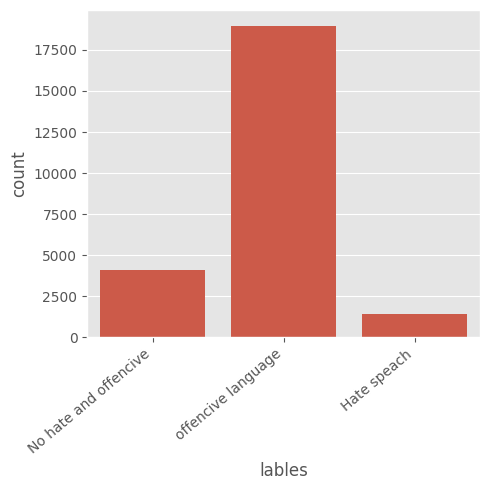

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(x='lables', data=tweetData)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

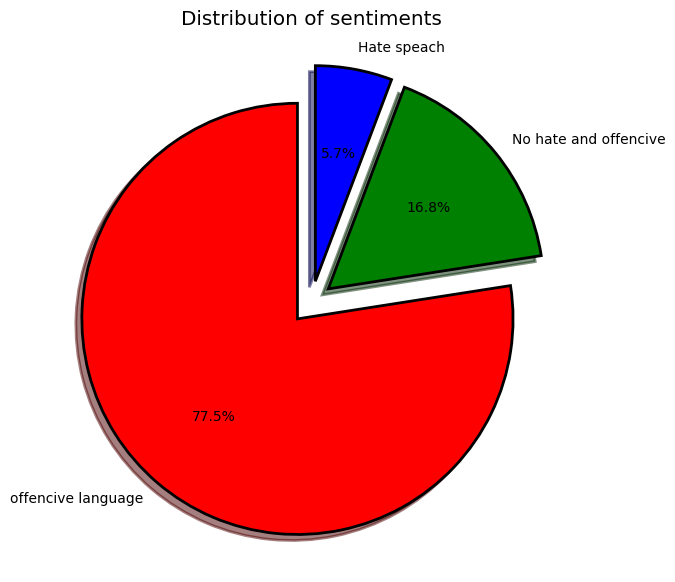

In [ ]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':2, "edgecolor":'black'}
tags = tweetData['lables'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments")

In [ ]:
# visualizing non-hate tweets
non_hate_tweets = tweetData[tweetData.lables=='No hate and offencive']
non_hate_tweets.head()

,tweet,lables
0,rt mayasolovely woman shouldnt complain cleani...,No hate and offencive
40,momma said pussy cats inside doghouse,No hate and offencive
63,simplyaddictedtoguys woof woof hot scally lad,No hate and offencive
66,allaboutmanfeet woof woof hot soles,No hate and offencive
67,allyhaaaaa lemmie eat oreo amp dishes one oreo...,No hate and offencive


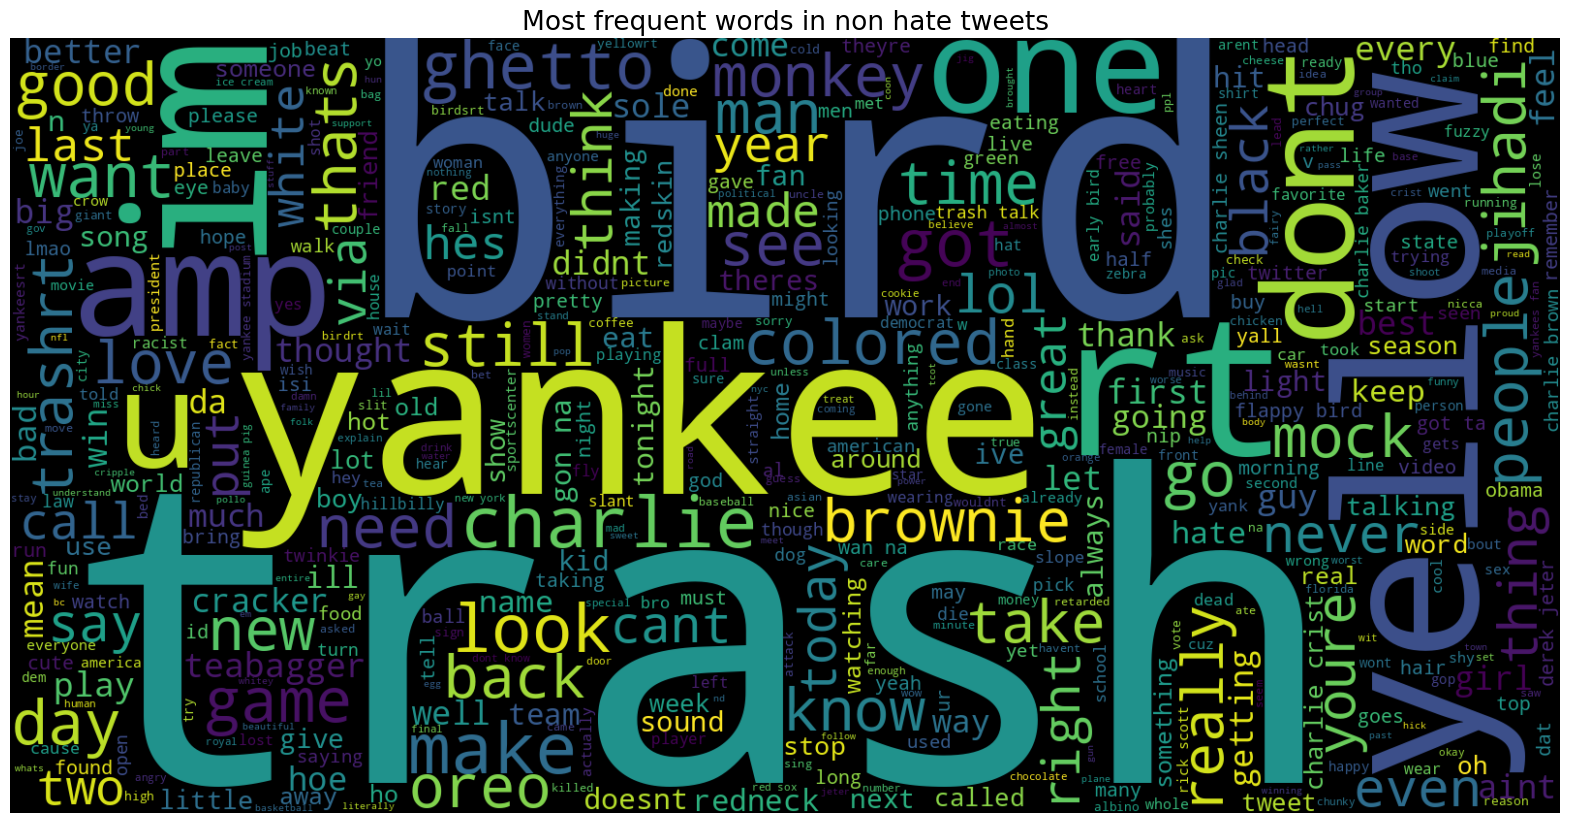

In [ ]:
# visualizing non-hate tweets using word cloud
text=''.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in non hate tweets", fontsize=19)
plt.show()

TF - IDF: Term frequence - Inverse Document Frequency



In [ ]:
vect=TfidfVectorizer(ngram_range=(1,2)).fit(tweetData['tweet'])


In [ ]:
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 200 features: \n", format(feature_names[:20]))

Number of features: {}
 161774
First 200 features: 
 ['aa' 'aa classes' 'aa lol' 'aaaaaaaaand' 'aaaaaaaaand begins' 'aaahhhhh'
 'aaahhhhh internet' 'aahahah' 'aahahah fuck' 'aaliyah' 'aaliyah curving'
 'aaliyahhhm' 'aaliyahhhm knowww' 'aaliyahhlovee' 'aaliyahhlovee yu'
 'aamaadmiparty' 'aamaadmiparty mix' 'aampt' 'aampt ackin' 'aamu']


In [ ]:
# TF-IDF Trigram Model¶


In [ ]:
vect=TfidfVectorizer(ngram_range=(1,3)).fit(tweetData['tweet'])


In [ ]:
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 200 features: \n", format(feature_names[:20]))

Number of features: {}
 310426
First 200 features: 
 ['aa' 'aa classes' 'aa classes bc' 'aa lol' 'aa lol gduenez' 'aaaaaaaaand'
 'aaaaaaaaand begins' 'aaaaaaaaand begins rt' 'aaahhhhh'
 'aaahhhhh internet' 'aaahhhhh internet died' 'aahahah' 'aahahah fuck'
 'aahahah fuck watches' 'aaliyah' 'aaliyah curving' 'aaliyah curving low'
 'aaliyahhhm' 'aaliyahhhm knowww' 'aaliyahhhm knowww righttt']


In [ ]:
#separating the data into x and y to build the model
X = tweetData['tweet']
Y = tweetData['lables']
X = vect.transform(X) #transforming the x data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
#printing the size of training and testing data
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (19604, 310426)
Size of Y_train (19604,)
Size of X_test (4902, 310426)
Size of Y_test (4902,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train) #loading x_train and y_train data on model
logreg_predict = logreg.predict(X_test) #predicting the value for test data
logreg_acc = accuracy_score(logreg_predict, Y_test)

In [ ]:
print("Test accuracy: {:.2f}%".format(logreg_acc*100)) #printing accuracy of the model


Test accuracy: 85.31%


In [ ]:
#printing confusion matrix and classification report
print(confusion_matrix(Y_test, logreg_predict))
print("\n")
print(classification_report(Y_test, logreg_predict))

[[  12   10  261]
 [   0  403  405]
 [   3   41 3767]]


                       precision    recall  f1-score   support

          Hate speach       0.80      0.04      0.08       283
No hate and offencive       0.89      0.50      0.64       808
   offencive language       0.85      0.99      0.91      3811

             accuracy                           0.85      4902
            macro avg       0.85      0.51      0.54      4902
         weighted avg       0.85      0.85      0.82      4902



# 2 Decision Tree Classifier



In [ ]:
#for training the data on decision tree classifier model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train) #loading x_train and y_train data on model
dtree_predict = dtree.predict(X_test) #predicting the value for test data
dtree_acc = accuracy_score(dtree_predict, Y_test)

In [ ]:
print("Test accuracy: {:.2f}%".format(dtree_acc*100)) #printing accuracy of the model


Test accuracy: 87.56%


In [ ]:
#printing confusion matrix and classification report
print(confusion_matrix(Y_test, dtree_predict))
print("\n")
print(classification_report(Y_test, dtree_predict))

[[  51   40  192]
 [  21  684  103]
 [  92  162 3557]]


                       precision    recall  f1-score   support

          Hate speach       0.31      0.18      0.23       283
No hate and offencive       0.77      0.85      0.81       808
   offencive language       0.92      0.93      0.93      3811

             accuracy                           0.88      4902
            macro avg       0.67      0.65      0.65      4902
         weighted avg       0.86      0.88      0.87      4902



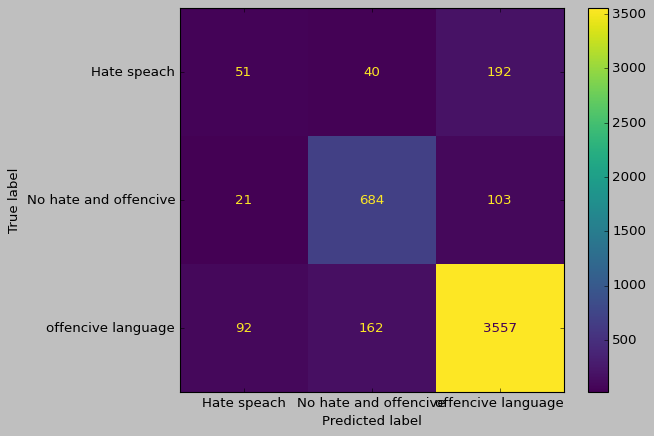

In [ ]:
#for visualizing confusion matrix
style.use('classic')
cm = confusion_matrix(Y_test, dtree_predict, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()

## TF - IDF

In [ ]:
import pandas as pd # read the csv
import re # regex to detect username, url, html entity
import nltk # to use word tokenize (split the sentence into words)
from nltk.corpus import stopwords # to remove the stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from keras.utils import to_categorical
from keras import backend as K

In [ ]:
df = pd.read_csv("/content/labeled_data.csv")
# extract the text and labels
tweet = list(df['tweet'])
labels = list(df['class'])

In [ ]:
## notes: all of the function taking 1 text at a time
stop_words = set(stopwords.words('english'))
# add rt to remove retweet in dataset (noise)
stop_words.add("rt")

# remove html entity:
def remove_entity(raw_text):
    entity_regex = r"&[^\s;]+;"
    text = re.sub(entity_regex, "", raw_text)
    return text

# change the user tags
def change_user(raw_text):
    regex = r"@([^ ]+)"
    text = re.sub(regex, "user", raw_text)

    return text

# remove urls
def remove_url(raw_text):
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(url_regex, '', raw_text)

    return text

# remove unnecessary symbols
def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')

    return text

# remove stopwords
def remove_stopwords(raw_text):
    tokenize = nltk.word_tokenize(raw_text)
    text = [word for word in tokenize if not word.lower() in stop_words]
    text = " ".join(text)

    return text

## this function in to clean all the dataset by utilizing all the function above
def preprocess(datas):
    clean = []
    # change the @xxx into "user"
    clean = [change_user(text) for text in datas]
    # remove emojis (specifically unicode emojis)
    clean = [remove_entity(text) for text in clean]
    # remove urls
    clean = [remove_url(text) for text in clean]
    # remove trailing stuff
    clean = [remove_noise_symbols(text) for text in clean]
    # remove stopwords
    clean = [remove_stopwords(text) for text in clean]

    return clean

In [ ]:
clean_tweet = preprocess(tweet)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(clean_tweet, labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
## Tokenizing -> basically we use tokenisation for many things, its commonly used for feature extraction in preprocessing. btw idk how it works as feature extraction tho :(
# declare the tokenizer
tokenizer = Tokenizer()
# build the vocabulary based on train dataset
tokenizer.fit_on_texts(X_train)
# tokenize the train and test dataset
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# vocabulary size (num of unique words) -> will be used in embedding layer
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
## Padding -> to uniform the datas
max_length = max(len(seq) for seq in X_train)

# to test an outlier case (if one of the test dataset has longer length)
for x in X_test:
    if len(x) > max_length:
        print(f"an outlier detected: {x}")

X_train = pad_sequences(X_train, maxlen = max_length)
X_test = pad_sequences(X_test, maxlen = max_length)

In [ ]:
# create hot_labels (idk whty tapi ini penting, kalo ga bakal error)
y_test = to_categorical(y_test, num_classes=3)
y_train = to_categorical(y_train, num_classes=3)

In [ ]:
# another look on the number of tweet in test and training data

print(f"num test tweet: {y_test.shape[0]}")
print(f"num train tweet: {y_train.shape[0]}")

num test tweet: 4957
num train tweet: 19826


In [ ]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

In [ ]:
# change dis if u want
output_dim = 200

# LSTM model architechture (CNN + LSTM)
model = Sequential([
    # embedding layer is like idk
    Embedding(vocab_size, output_dim, input_length=max_length),
    # lstm for xxx
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    # dropout to prevent overfitting
    Dropout(0.5),
    # dense to connect the previous output with current layer
    Dense(128, activation="relu"),
    # dropout to prevent overfitting
    Dropout(0.5),
    # this is output layer, with 3 class (0, 1, 2)
    Dense(3, activation="softmax"),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1,precision, recall])

In [ ]:
# checking the model parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 26, 200)           3734200   
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 3810747 (14.54 MB)
Trainable params: 38107

In [ ]:
# Train the model
model_history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
310/310 [==============================] - 69s 180ms/step - loss: 0.4573 - accuracy: 0.8437 - f1: 0.8229 - precision: 0.8552 - recall: 0.7995 - val_loss: 0.3372 - val_accuracy: 0.8836 - val_f1: 0.8847 - val_precision: 0.8975 - val_recall: 0.8725
Epoch 2/10
310/310 [==============================] - 54s 173ms/step - loss: 0.2427 - accuracy: 0.9198 - f1: 0.9193 - precision: 0.9302 - recall: 0.9089 - val_loss: 0.3484 - val_accuracy: 0.8800 - val_f1: 0.8790 - val_precision: 0.8869 - val_recall: 0.8715
Epoch 3/10
310/310 [==============================] - 47s 151ms/step - loss: 0.1534 - accuracy: 0.9466 - f1: 0.9458 - precision: 0.9501 - recall: 0.9416 - val_loss: 0.3809 - val_accuracy: 0.8826 - val_f1: 0.8828 - val_precision: 0.8868 - val_recall: 0.8789
Epoch 4/10
310/310 [==============================] - 39s 127ms/step - loss: 0.1079 - accuracy: 0.9615 - f1: 0.9614 - precision: 0.9628 - recall: 0.9600 - val_loss: 0.4500 - val_accuracy: 0.8715 - val_f1: 0.8717 - val_precision: 

In [ ]:
New_text = [" momma said no pussy cats inside my doghouse"]

In [ ]:
clean_tweet_test = preprocess(New_text)

tokenizer.fit_on_texts(clean_tweet_test)
clean_tweet_test = tokenizer.texts_to_sequences(clean_tweet_test)
clean_tweet_test = pad_sequences(clean_tweet_test, maxlen = max_length)
output = model.predict(clean_tweet_test)
print(output)
predicted_category_index = np.argmax(output)
# Map the index to the category
categories = ['Hate speach', 'offencive language', 'No hate and offencive']  # Adjust the category names based on your model
predicted_category = categories[predicted_category_index]
print(predicted_category)

1/1 [==============================] - 0s 26ms/step
[[3.3566757e-05 9.9738461e-01 2.5819154e-03]]
offencive language


1/1 [==============================] - 0s 56ms/step


array([[2.2050277e-05, 9.9996352e-01, 1.4482952e-05]], dtype=float32)

In [ ]:
predicted_category

'offencive language'